<a href="https://colab.research.google.com/github/AyushSrivastava27/EthVision/blob/main/EthVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0628abc4-f003-ed03-22a0-144ffcf9673b)


In [16]:
!wget https://raw.githubusercontent.com/AyushSrivastava27/EthVision/main/ETH-USD.csv

--2024-03-27 05:27:55--  https://raw.githubusercontent.com/AyushSrivastava27/EthVision/main/ETH-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186463 (182K) [text/plain]
Saving to: ‘ETH-USD.csv.1’

ETH-USD.csv.1       100%[===================>] 182.09K  --.-KB/s    in 0.003s  

2024-03-27 05:27:56 (56.7 MB/s) - ‘ETH-USD.csv.1’ saved [186463/186463]



In [17]:
import pandas as pd
df = pd.read_csv("/content/ETH-USD.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,8.932500e+08
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2330 entries, 2017-11-09 to 2024-03-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2329 non-null   float64
 1   High       2329 non-null   float64
 2   Low        2329 non-null   float64
 3   Close      2329 non-null   float64
 4   Adj Close  2329 non-null   float64
 5   Volume     2329 non-null   float64
dtypes: float64(6)
memory usage: 127.4 KB


In [19]:
df = df.astype({"Close":'float64'})

In [20]:
len(df)

2330

In [21]:
# Only want closing price for each day
ethereum_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
ethereum_prices.head()

,Price
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003


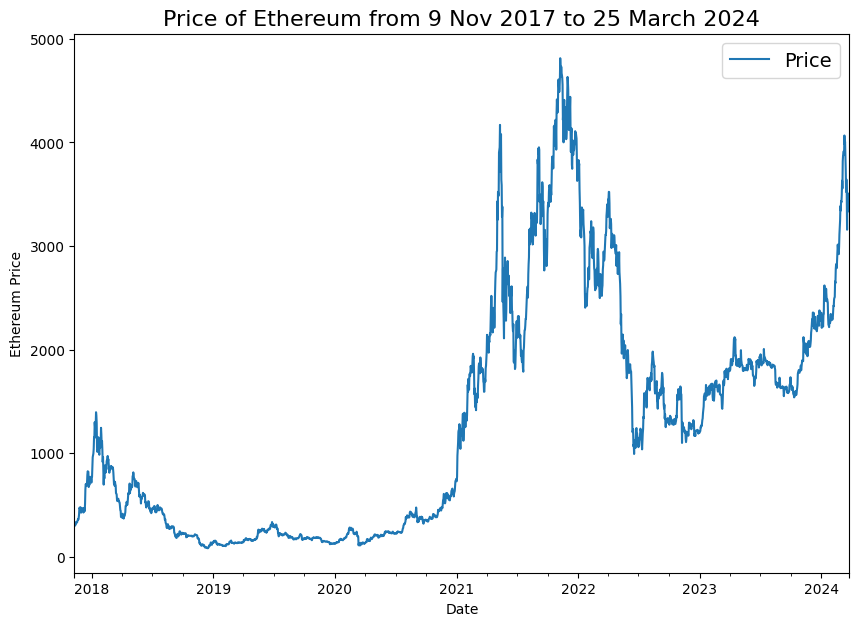

In [22]:
import matplotlib.pyplot as plt
ethereum_prices.plot(figsize = (10,7))
plt.ylabel("Ethereum Price")
plt.title("Price of Ethereum from 9 Nov 2017 to 25 March 2024", fontsize = 16)
plt.legend(fontsize = 14);


### Importing Time Series Data with Python's CSV Module

In [29]:
import csv
from datetime import datetime

timesteps = []
eth_price = []
with open("/content/ETH-USD.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d"))
    eth_price.append(line[4])

# View first 10 of each
timesteps[:10], eth_price[:10]

([datetime.datetime(2017, 11, 9, 0, 0),
  datetime.datetime(2017, 11, 10, 0, 0),
  datetime.datetime(2017, 11, 11, 0, 0),
  datetime.datetime(2017, 11, 12, 0, 0),
  datetime.datetime(2017, 11, 13, 0, 0),
  datetime.datetime(2017, 11, 14, 0, 0),
  datetime.datetime(2017, 11, 15, 0, 0),
  datetime.datetime(2017, 11, 16, 0, 0),
  datetime.datetime(2017, 11, 17, 0, 0),
  datetime.datetime(2017, 11, 18, 0, 0)],
 ['320.884003',
  '299.252991',
  '314.681000',
  '307.907990',
  '316.716003',
  '337.631012',
  '333.356995',
  '330.924011',
  '332.394012',
  '347.612000'])

In [32]:
for i in range(len(eth_price)):
    if eth_price[i] != 'null':
        eth_price[i] = float(eth_price[i])
    else:
        eth_price[i] = None

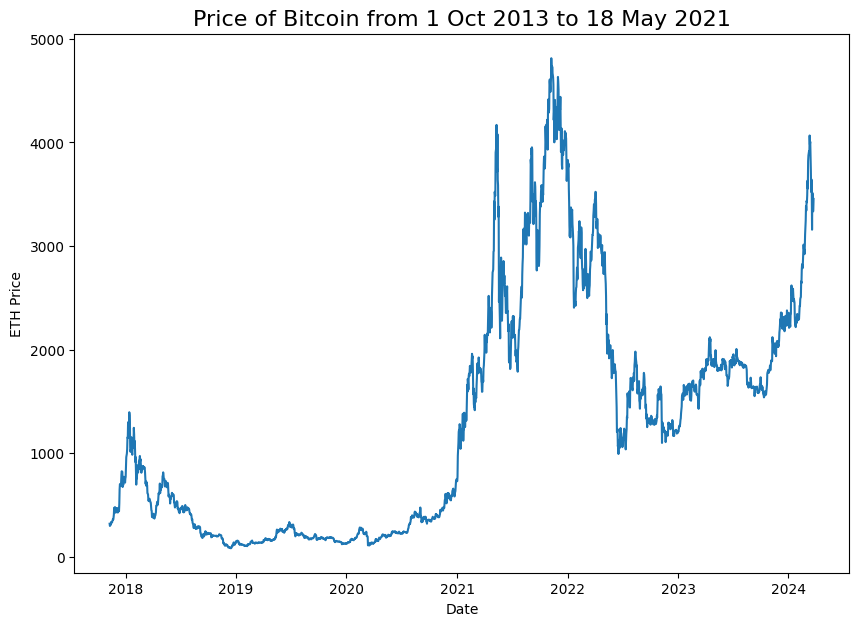

In [33]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, eth_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("ETH Price");

### Creating Train and Test Set (for time series data)

In [34]:
timesteps = ethereum_prices.index.to_numpy()
prices = ethereum_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2017-11-09T00:00:00.000000000', '2017-11-10T00:00:00.000000000',
        '2017-11-11T00:00:00.000000000', '2017-11-12T00:00:00.000000000',
        '2017-11-13T00:00:00.000000000', '2017-11-14T00:00:00.000000000',
        '2017-11-15T00:00:00.000000000', '2017-11-16T00:00:00.000000000',
        '2017-11-17T00:00:00.000000000', '2017-11-18T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([320.884003, 299.252991, 314.681   , 307.90799 , 316.716003,
        337.631012, 333.356995, 330.924011, 332.394012, 347.612   ]))

In [36]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1864, 466, 1864, 466)

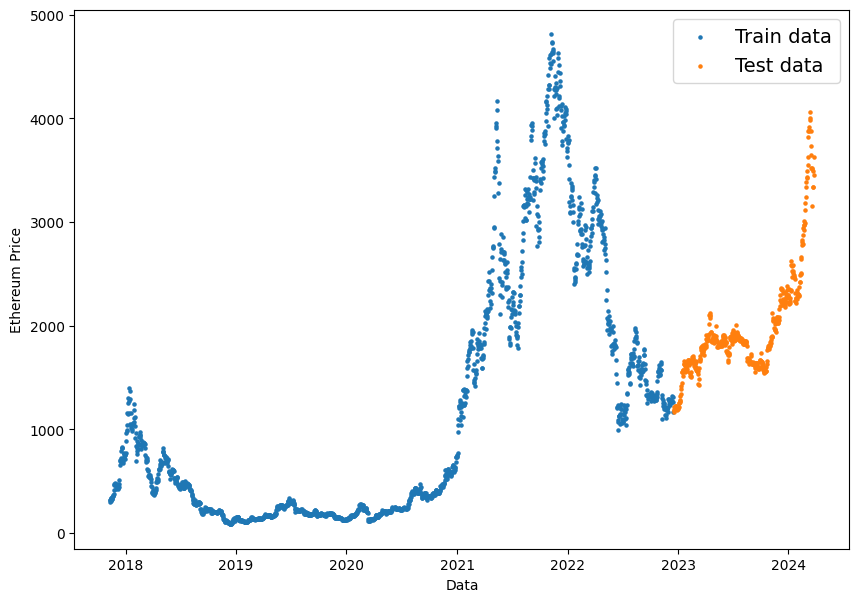

In [40]:
plt.figure(figsize= (10, 7))
plt.scatter(X_train, y_train, s=5, label= "Train data")
plt.scatter(X_test, y_test, s=5, label= "Test data")
plt.xlabel("Data")
plt.ylabel("Ethereum Price")
plt.legend(fontsize=14)
plt.show();

**Creating a plotting Function**

In [41]:
def plot_time_series(timesteps, values, format='.',start=0, end= None, label= None):
  plt.plot(timesteps[start:end], values[start:end], format, label= label)
  plt.xlabel("Time")
  plt.ylabel("Ethereum Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

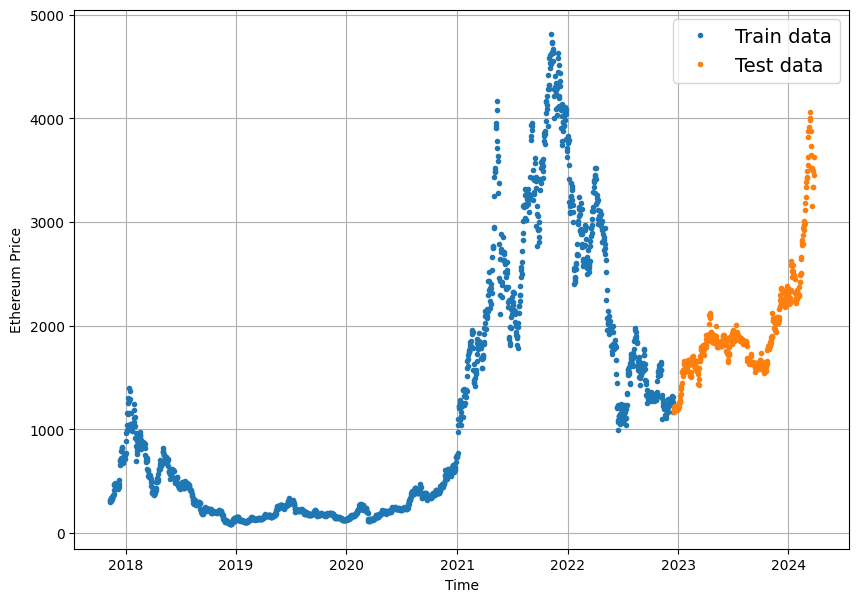

In [42]:
plt.figure(figsize= (10, 7))
plot_time_series(timesteps= X_train, values= y_train, label= "Train data")
plot_time_series(timesteps= X_test, values= y_test, label= "Test data")

## Modelling Experiment

### Naive Model (baseline)



In [43]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([1188.149536, 1184.71521 , 1167.609863, 1217.703613, 1213.599976,
        1218.182129, 1220.159424, 1221.14856 , 1218.962036, 1226.974365]),
 array([3522.860107, 3642.413086, 3517.985107, 3157.618164, 3513.393066,
        3492.991211, 3333.687988, 3336.593994, 3454.636475,         nan]))

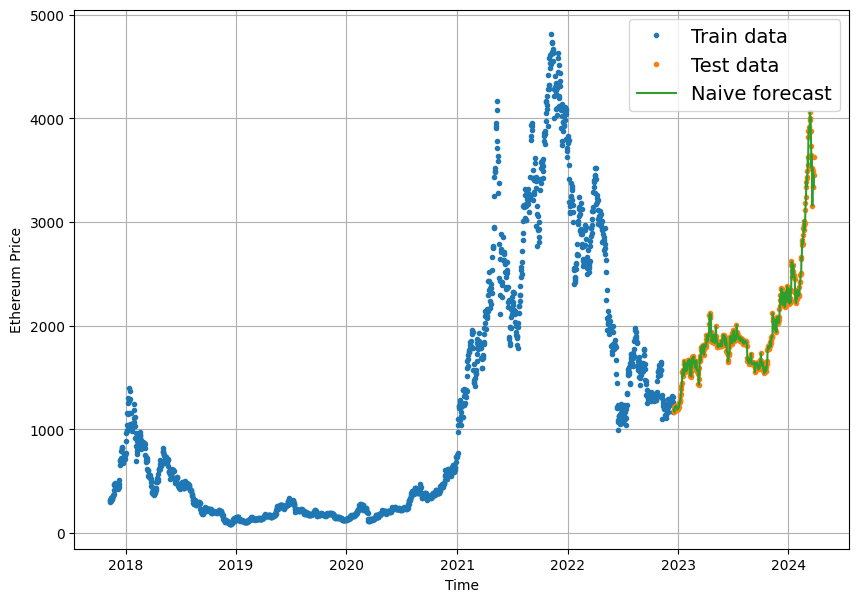

In [44]:
plt.figure(figsize= (10, 7))
plot_time_series(timesteps= X_train, values= y_train, label= "Train data")
plot_time_series(timesteps= X_test, values= y_test, label= "Test data")
plot_time_series(timesteps= X_test[1:], values= naive_forecast, format= "-", label= "Naive forecast");

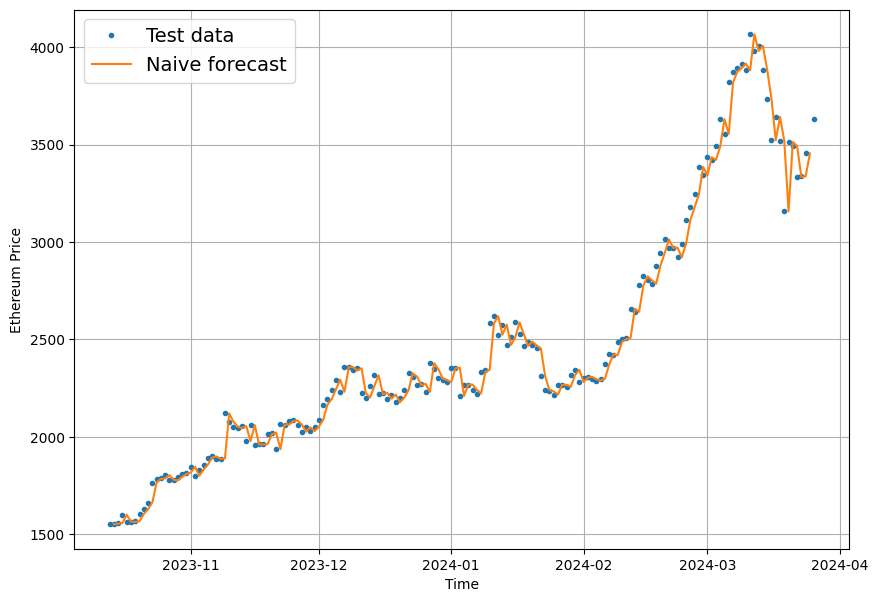

In [45]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating a time series model

**Scale-dependent errors**
- MAE (mean absolute error)
- RMSE (root mean square error)

**Percentage errors**
- MAPE (mean absolute percentage error)
- sMAPE (symmetric mean absolute error)

**Scaled Errors**
- MASE (mean absolute scaled error)

In [46]:
import tensorflow as tf